# Ensemble Methods and ROC-AUC Scores

Initial imports and grabbing the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier, plot_tree

df = pd.read_csv('data/diabetes.csv')

In [2]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
#create numpy arrays for predictors and target variables 
X = df.drop('Outcome',axis=1)
y = df['Outcome']

In [6]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## First, A Recap:

In [7]:
# let's create a really small simple tree
tree = DecisionTreeClassifier(criterion='gini')

tree.fit(X_train, y_train)

DecisionTreeClassifier()

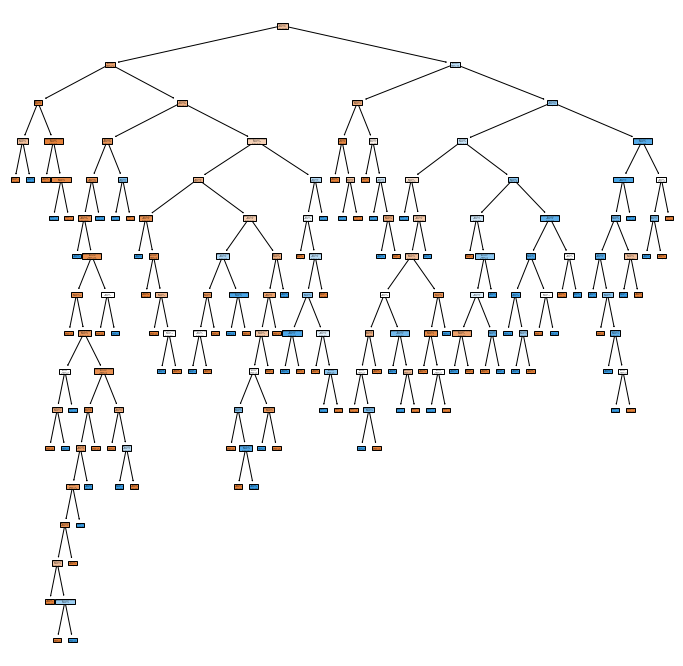

In [8]:
# let's also visualize and discuss as we make changes
plt.figure(figsize=(12,12))
plot_tree(tree, feature_names=X.columns, filled=True)
plt.show()

## Ensemble Methods: From Decision Trees to Forests

Ensemble Methods take advantage of the "wisdom of crowds" where the average of multiple independent estimates is usually more consistently accurate than the individual estimates.

### Simple Ensemble Techniques - How do we use the wisdom of the crowd? 

1. **Max Voting** - The max voting method is generally used for classification problems. In this technique, multiple models are used to make predictions for each data point. The predictions by each model are considered as a ‘vote’. The predictions which we get from the majority of the models are used as the final prediction.

> For example, when you asked 5 of your colleagues to rate your movie (out of 5); we’ll assume three of them rated it as 4 while two of them gave it a 5. Since the majority gave a rating of 4, the final rating will be taken as 4. You can consider this as taking the mode of all the predictions.

2. **Averaging** - Similar to the max voting technique, multiple predictions are made for each data point in averaging. In this method, we take an average of predictions from all the models and use it to make the final prediction. Averaging can be used for making predictions in regression problems or while calculating probabilities for classification problems. 

> Note - this is how sklearn's random forest classifier works

3. **Weighted Averaging** - This is an extension of the averaging method. All models are assigned different weights defining the importance of each model for prediction. 

> In the same previous example, if two of your colleagues are critics, while others have no prior experience in this field, then the answers by these two friends are given more importance as compared to the other people.

[User Guide!](https://scikit-learn.org/stable/modules/ensemble.html#forest)

### Examples of Ensembles 

* Bootstrap Aggregation (Bagging):
    * Random Forests
* Gradient Boosting algorithms:
    * Adaboost
    * Gradient Boosted Trees (GBM)
    * XGBoost 



## Bagging 

The idea behind **bagging** is combining the results of multiple models (for instance, all decision trees) to get a generalized result. Here’s a question: If you create all the models on the same set of data and combine it, will it be useful? There is a high chance that these models will give the same result since they are getting the same input. So how can we solve this problem? One of the techniques is bootstrapping.

**Bootstrapping** is a sampling technique in which we create subsets of observations from the original dataset, with replacement. The size of the subsets is the same as the size of the original set.

**Bagging (or Bootstrap Aggregating)** technique uses these subsets (bags) to get a fair idea of the distribution (complete set). The size of subsets created for bagging may be less than the original set.
![](https://cdn.analyticsvidhya.com/wp-content/uploads/2018/05/image20-768x289.png)


Multiple subsets are created from the original dataset, selecting observations with replacement.
A base model (weak model) is created on each of these subsets.
The models run in parallel and are independent of each other.
The final predictions are determined by combining the predictions from all the models.
![](https://cdn.analyticsvidhya.com/wp-content/uploads/2018/05/Screenshot-from-2018-05-08-13-11-49-768x580.png)

## Random Forests

Random Forest is an ensemble machine learning algorithm that follows the bagging technique. It is an extension of the bagging estimator algorithm. The base estimators in random forest are decision trees. Unlike bagging meta estimator, random forest randomly selects a set of features which are used to decide the best split at each node of the decision tree.

Looking at it step-by-step, this is what a random forest model does:

1. Random subsets are created from the original dataset (bootstrapping).
2. At each node in the decision tree, only a random set of features are considered to decide the best split.
3. A decision tree model is fitted on each of the subsets.
4. The final prediction is calculated by averaging the predictions from all decision trees.

**Note:** *The decision trees in random forest can be built on a subset of data and features. Particularly, the sklearn model of random forest uses all features for decision tree and a subset of features are randomly selected for splitting at each node.*

To sum up, Random forest randomly selects data points and features, and builds multiple trees (Forest) .

### Some hyperparameters to tune 

* **n_estimators:**
It defines the number of decision trees to be created in a random forest.
Generally, a higher number makes the predictions stronger and more stable, but a very large number can result in higher training time.

* **criterion:**
It defines the function that is to be used for splitting.
The function measures the quality of a split for each feature and chooses the best split.

* **max_features :**
It defines the maximum number of features allowed for the split in each decision tree.
Increasing max features usually improve performance but a very high number can decrease the diversity of each tree.

* **max_depth:**
Random forest has multiple decision trees. This parameter defines the maximum depth of the trees.

* **min_samples_split:**
Used to define the minimum number of samples required in a leaf node before a split is attempted.
If the number of samples is less than the required number, the node is not split.

* **min_samples_leaf:** 
This defines the minimum number of samples required to be at a leaf node.
Smaller leaf size makes the model more prone to capturing noise in train data.

* **max_leaf_nodes:** 
This parameter specifies the maximum number of leaf nodes for each tree.
The tree stops splitting when the number of leaf nodes becomes equal to the max leaf node.

In [9]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    
    # updated 3/15 to properly add proba for roc_auc_scores
    train_preds_proba = model.predict_proba(X_train)[:, 1]
    test_preds_proba = model.predict_proba(X_test)[:, 1]  
    
    print('Train Scores:')
    print(f"Accuracy: {model.score(X_train, y_train):.3f}")
    print(f"F1 Score: {f1_score(y_train, train_preds):.3f}")
    print(f"ROC-AUC: {roc_auc_score(y_train, train_preds_proba):.3f}")
    print('Test Scores:')
    print(f"Accuracy: {model.score(X_test, y_test):.3f}")
    print(f"F1 Score: {f1_score(y_test, test_preds):.3f}")
    print(f"ROC-AUC: {roc_auc_score(y_test, test_preds_proba):.3f}")

In [10]:
#applying Random forest to diabetes data 
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=5, min_samples_split=15, n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, y_test)))

Accuracy on training set: 0.844
Accuracy on test set: 0.797


In [11]:
rf_pred = rf.predict(X_test) #predictions 
rf_score = f1_score(rf_pred, y_test) # F1 score 
rf_acc = accuracy_score(rf_pred, y_test) #Accuracy 

print(f'F1 Score: {rf_score:.4f}')
print(f'Accuracy: {rf_acc:.4f}')

F1 Score: 0.6846
Accuracy: 0.7965


In [12]:
evaluate_model(rf, X_train, X_test, y_train, y_test)

Train Scores:
Accuracy: 0.844
F1 Score: 0.744
ROC-AUC: 0.925
Test Scores:
Accuracy: 0.797
F1 Score: 0.685
ROC-AUC: 0.877


In [13]:
# explore feature importances
feats = rf.feature_importances_
feature_imps = dict(zip(X.columns, feats))
feature_imps

{'Pregnancies': 0.06588877771313195,
 'Glucose': 0.30111408552438157,
 'BloodPressure': 0.05769675506172673,
 'SkinThickness': 0.05236945331963412,
 'Insulin': 0.07266063652780723,
 'BMI': 0.20512085835314942,
 'DiabetesPedigreeFunction': 0.10829390694640387,
 'Age': 0.13685552655376518}

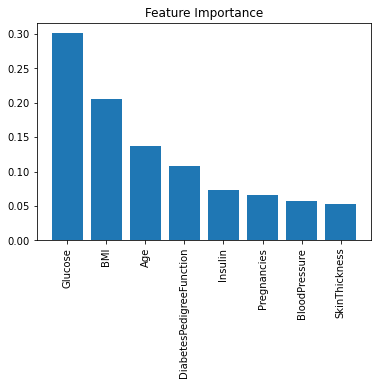

In [14]:
# visualizing feature importances
# creating list of column names
feat_names=list(X.columns)

# Sort feature importances in descending order
indices = np.argsort(feats)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [feat_names[i] for i in indices]

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X_train.shape[1]), feats[indices])

# Add feature names as x-axis labels
plt.xticks(range(X_train.shape[1]), names, rotation=90)

# Show plot
plt.show()

### Pros and Cons of Random forests 

**Pros:**
* Strong performance because this is an ensemble algorithm, the model is naturally resistant to noise and variance in the data, and generally tends to perform quite well.

* Interpretability: each tree in the random forest is a Glass-Box Model (meaning that the model is interpretable, allowing us to see how it arrived at a certain decision), the overall random forest is, as well!

**Cons:**
* Computational complexity: On large datasets, the runtime can be quite slow compared to other algorithms.

* Memory usage: Random forests tend to have a larger memory footprint that other models. It's not uncommon to see random forests that were trained on large datasets have memory footprints in the tens, or even hundreds of MB.

## Boosting 
Boosting is a sequential process, where each subsequent model attempts to correct the errors of the previous model. The succeeding models are dependent on the previous model. Let’s understand the way boosting works in the below steps.

1. A subset is created from the original dataset.
2. Initially, all data points are given equal weights.
3. A base model is created on this subset.
4. This model is used to make predictions on the whole dataset.
![](https://cdn.analyticsvidhya.com/wp-content/uploads/2015/11/dd1-e1526989432375.png)

5. Errors are calculated using the actual values and predicted values.
6. The observations which are incorrectly predicted, are given higher weights.(Here, the three misclassified blue-plus points will be given higher weights)
7. Another model is created and predictions are made on the dataset.(This model tries to correct the errors from the previous model)
![](https://cdn.analyticsvidhya.com/wp-content/uploads/2015/11/dd2-e1526989487878.png)

8. Similarly, multiple models are created, each correcting the errors of the previous model.
9. The final model (strong learner) is the weighted mean of all the models (weak learners).
![](https://www.analyticsvidhya.com/wp-content/uploads/2015/11/boosting10-300x205.png)

Thus, the boosting algorithm combines a number of weak learners to form a strong learner. The individual models would not perform well on the entire dataset, but they work well for some part of the dataset. Thus, each model actually boosts the performance of the ensemble.
![](https://cdn.analyticsvidhya.com/wp-content/uploads/2015/11/dd4-e1526551014644.png)

## AdaBoost 

[Thorough post on AdaBoost](https://www.datacamp.com/community/tutorials/adaboost-classifier-python)

Adaptive boosting or **AdaBoost** is one of the simplest boosting algorithms. Usually, decision trees are used for modelling. Multiple sequential models are created, each correcting the errors from the last model. AdaBoost assigns weights to the observations which are incorrectly predicted and the subsequent model works to predict these values correctly.

**Below are the steps for performing the AdaBoost algorithm:**

1. Initially, all observations in the dataset are given equal weights.
2. A model is built on a subset of data.
3. Using this model, predictions are made on the whole dataset.
4. Errors are calculated by comparing the predictions and actual values.
5. While creating the next model, higher weights are given to the data points which were predicted incorrectly.
6. Weights can be determined using the error value. For instance, higher the error more is the weight assigned to the observation.
7. This process is repeated until the error function does not change, or the maximum limit of the number of estimators is reached.

### Some hyperparameters to tune 

- **base_estimators:** 

    - It helps to specify the type of base estimator, that is, the machine learning algorithm to be used as base learner.
    
- **n_estimators:**

    - It defines the number of base estimators.
    -  default value is 10, but you should keep a higher value to get better performance.
    
- **learning_rate:** 

    - This parameter controls the contribution of the estimators in the final combination.
    - There is a trade-off between learning_rate and n_estimators.
    

In [15]:
#applying Adaboost 
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                         random_state=1, n_estimators=200)
ada.fit(X_train, y_train)
ada.score(X_test,y_test)

0.8051948051948052

In [16]:
evaluate_model(ada, X_train, X_test, y_train, y_test)

Train Scores:
Accuracy: 0.894
F1 Score: 0.837
ROC-AUC: 0.967
Test Scores:
Accuracy: 0.805
F1 Score: 0.717
ROC-AUC: 0.825


## Gradient Boosting (GBM) 

Gradient Boosting or GBM is another ensemble machine learning algorithm that works for both regression and classification problems. GBM uses the boosting technique, combining a number of weak learners to form a strong learner. Decision trees are used as a base learner, each subsequent tree in series is built on the errors calculated by the previous tree.

We will use a simple example to understand the GBM algorithm. We have to predict the age of a group of people using the below data:
![](https://cdn.analyticsvidhya.com/wp-content/uploads/2018/05/image-17-768x334.png)

1. The mean age is assumed to be the predicted value for all observations in the dataset.
2. The errors are calculated using this mean prediction and actual values of age.
![](https://cdn.analyticsvidhya.com/wp-content/uploads/2018/05/image-18-768x318.png)

3. A tree model is created using the errors calculated above as target variable. Our objective is to find the best split to minimize the error.
4. The predictions by this model are combined with the predictions 1.
![](https://cdn.analyticsvidhya.com/wp-content/uploads/2018/06/gbm2-768x345.png)

5. This value calculated above is the new prediction.
6. New errors are calculated using this predicted value and actual value.
![](https://cdn.analyticsvidhya.com/wp-content/uploads/2018/06/gbm3.png)

7. Steps 2 to 6 are repeated till the maximum number of iterations is reached (or error function does not change).

In [17]:
#apply GBM to diabetes data 
from sklearn.ensemble import GradientBoostingClassifier

gbm = GradientBoostingClassifier(learning_rate=0.01, random_state=1)
gbm.fit(X_train, y_train)
gbm.score(X_test,y_test)

0.7619047619047619

In [18]:
evaluate_model(gbm, X_train, X_test, y_train, y_test)

Train Scores:
Accuracy: 0.782
F1 Score: 0.571
ROC-AUC: 0.891
Test Scores:
Accuracy: 0.762
F1 Score: 0.593
ROC-AUC: 0.867


## XGBoost

XGBoost (eXtreme Gradient Boosting) is an advanced implementation of the gradient boosting algorithm. XGBoost has proved to be a highly effective ML algorithm, extensively used in machine learning competitions and hackathons. XGBoost has high predictive power and is almost 10 times faster than the other gradient boosting techniques. It also includes a variety of regularization which reduces overfitting and improves overall performance. Hence it is also known as ‘regularized boosting‘ technique.

**Pros of XGBoost:** 

1. Regularization:
    - Standard GBM implementation has no regularisation like XGBoost.
    - Thus XGBoost also helps to reduce overfitting.
    
    
2. Parallel Processing:
    - XGBoost implements parallel processing and is faster than GBM .
    - XGBoost also supports implementation on Hadoop.
    
    
3. High Flexibility:
    - XGBoost allows users to define custom optimization objectives and evaluation criteria adding a whole new dimension to the model.
    
    
4. Handling Missing Values:
    - XGBoost has an in-built routine to handle missing values.
    
    
5. Tree Pruning:
    * XGBoost makes splits up to the max_depth specified and then starts pruning the tree backwards and removes splits beyond which there is no positive gain.
    
    
6. Built-in Cross-Validation:
    * XGBoost allows a user to run a cross-validation at each iteration of the boosting process and thus it is easy to get the exact optimum number of boosting iterations in a single run.
    
    
### Some hyperparameters to tune 

* **nthread:**
    * This is used for parallel processing and the number of cores in the system should be entered..If you wish to run on all cores, do not input this value. The algorithm will detect it automatically.

* **eta:**
    * Analogous to learning rate in GBM.
    * Makes the model more robust by shrinking the weights on each step.

* **min_child_weight:** 
    * Defines the minimum sum of weights of all observations required in a child.
    * Used to control over-fitting. Higher values prevent a model from learning relations which might be highly specific to the particular sample selected for a tree.
    
* **max_depth:** 
    * It is used to define the maximum depth.
    * Higher depth will allow the model to learn relations very specific to a particular sample.
    
* **max_leaf_nodes:** 
    * The maximum number of terminal nodes or leaves in a tree.
    * Can be defined in place of max_depth. Since binary trees are created, a depth of ‘n’ would produce a maximum of 2^n leaves.
    * If this is defined, GBM will ignore max_depth.
    
* **gamma:** 
    * A node is split only when the resulting split gives a positive reduction in the loss function. Gamma specifies the minimum loss reduction required to make a split.
    * Makes the algorithm conservative. The values can vary depending on the loss function and should be tuned.

* **subsample:**
    * Same as the subsample of GBM. Denotes the fraction of observations to be randomly sampled for each tree.
    * Lower values make the algorithm more conservative and prevent overfitting but values that are too small might lead to under-fitting.

* **colsample_bytree:** 
    * It is similar to max_features in GBM.
    * Denotes the fraction of columns to be randomly sampled for each tree.

In [19]:
#!conda install py-xgboost

In [20]:
#applying boosting techniques to diabetes data 
import xgboost as xgb # note! not from sklearn

xgb_model = xgb.XGBClassifier(random_state=1, learning_rate=0.01)

xgb_model.fit(X_train, y_train)
xgb_model.score(X_test,y_test)

0.8051948051948052

In [21]:
evaluate_model(xgb_model, X_train, X_test, y_train, y_test)

Train Scores:
Accuracy: 0.903
F1 Score: 0.851
ROC-AUC: 0.964
Test Scores:
Accuracy: 0.805
F1 Score: 0.706
ROC-AUC: 0.858


-----

(and now for something completely different)

## ROC-AUC 

Aka a metric which calculates the Area Under the Curve (AUC) for the Receiver Operator Characteristic (ROC).

Why is it useful? Tests not only how 'good' your model is, but also how good it is at ordering its predictions.

### Some Resources that Explain ROC-AUC Best:

From Analytics Vidhya:

> "The Receiver Operator Characteristic (ROC) curve is an evaluation metric for binary classification problems. It is a probability curve that plots the TPR against FPR at various threshold values and essentially separates the ‘signal’ from the ‘noise’. The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve."

| Perfect ROC Curve | More Typical ROC Curve | Bad ROC Curve (no better than guessing) |
|---|---|---|
|![perfect ROC curve](images/perfectAUC.webp) | ![more 'normal' ROC curve](images/midAUC.webp) | ![bad ROC curve](images/badAUC.webp) |

---

From [Google's Machine Learning Crash Course](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc):

> "AUC provides an aggregate measure of performance across all possible classification thresholds. One way of interpreting AUC is **as the probability that the model ranks a random positive example more highly than a random negative example**. For example, given the following examples, which are arranged from left to right in ascending order of logistic regression predictions:
> 
> ![auc predictions ranked](images/AUCPredictionsRanked.svg)
>
> "AUC represents the probability that a random positive (green) example is positioned to the right of a random negative (red) example."


In [22]:
from sklearn.metrics import plot_roc_curve

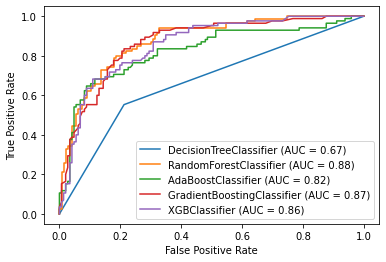

In [23]:
models = [tree, rf, ada, gbm, xgb_model]

fig, ax = plt.subplots()

for model in models:
    plot_roc_curve(model, X_test, y_test, ax=ax)

## More Resources!

- [Slideshow on bagging and boosting ensemble methods](http://www2.stat.duke.edu/~rcs46/lectures_2017/08-trees/08-tree-advanced.pdf)
- [Great short podcast on ROC-AUC](http://lineardigressions.com/episodes/2017/1/29/rock-the-roc-curve)
    - [Plus the same podcast on Ensemble Methods](http://lineardigressions.com/episodes/2017/1/22/ensemble-algorithms)